# Análise Exploratória de Dados

### Introdução

Análise de um recorte de dados de imóveis na cidade de São Paulo onde os preços vão até 2000R$

## Dataset
- Fonte : https://www.kaggle.com/datasets/rubenssjr/brasilian-houses-to-rent


## Informações sobre os dados

- Colunas
    - **city**: Nome da cidade onde os dados foram obtidos
    - **area**: Área em m² do imóvel 
    - **rooms**: Número de Quartos
    - **bathroom**:Número de Banheiros
    - **parking spaces**: Quantidade de garagens
    - **floor**: Andar do imovel
    - **animal**: Aceita Animais domesticos?
    - **furniture**: Imóvel Imobiliado?
    - **hoa (R\$)**: Valor do condomínio
    - **rent amount (R\$)**: Valor do Aluguel
    - **property tax (R\$)**: Valor do IPTU
    - **fire insurance (R\$)**: Valor do Seguro de Incêndio
    - **total (R\$)**: Valor total de aluguel do imóvel

## Objetivos
- Os dados apresentam dados de outras cidades além de São Paulo (Rio de Janeiro, Campinas, Porto Alegre), o objetivo é fazer um recorte especifico da cidade de são Paulo com alugueis abaixo ou igual a 2000R$ e Análisar os dados

## Perguntas
- Existe Relação entre quantidade de quartos e preço em imóveis da cidade de São Paulo abaixo de 2000R\$?
- Existe Relação entre quantidade de banheiros e preço em imóveis da cidade de São Paulo abaixo de 2000R\$?
- Existe Relação entre quantidade de garagens e preço em imóveis da cidade de São Paulo abaixo de 2000R\$?

In [59]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind

In [60]:
# carregar base de dados
precoAluguelImoveisSP_df = pd.read_csv('./dados_preço_aluguel_BR.csv', sep=',')

In [61]:
precoAluguelImoveisSP_df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


## Pré Processamento

In [62]:
precoAluguelImoveisSP_df.shape

(10692, 13)

Existe 10692 dados, levando em conta todos os alugueis de todas as cidades, primeiro será feito o recorte que se quer análisar

### Filtrar os dados de São Paulo que vão até 2000R$

In [63]:
# Pegar apenas dados da cidade de São Paulo
selecao = (precoAluguelImoveisSP_df['city'] == 'São Paulo') & (precoAluguelImoveisSP_df['total (R$)'] <= 2000)

precoAluguelImoveisSP_df = precoAluguelImoveisSP_df[selecao]
precoAluguelImoveisSP_df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
23,São Paulo,35,1,1,0,-,acept,not furnished,0,1100,3,14,1117
38,São Paulo,70,2,1,0,-,not acept,not furnished,0,1150,59,18,1227
53,São Paulo,60,2,1,0,2,acept,not furnished,200,1445,0,19,1664
71,São Paulo,45,1,1,0,-,acept,not furnished,0,1050,46,16,1112


Quantidade de dados depois do filtro

In [64]:
precoAluguelImoveisSP_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 807 entries, 4 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 807 non-null    object
 1   area                 807 non-null    int64 
 2   rooms                807 non-null    int64 
 3   bathroom             807 non-null    int64 
 4   parking spaces       807 non-null    int64 
 5   floor                807 non-null    object
 6   animal               807 non-null    object
 7   furniture            807 non-null    object
 8   hoa (R$)             807 non-null    int64 
 9   rent amount (R$)     807 non-null    int64 
 10  property tax (R$)    807 non-null    int64 
 11  fire insurance (R$)  807 non-null    int64 
 12  total (R$)           807 non-null    int64 
dtypes: int64(9), object(4)
memory usage: 88.3+ KB


* Existem 807 observações que estão dentro do padrão especificado.
* O floor (andar) está como object, mas é para ser um tipo numerico

### Corrigir coluna "floor"

In [65]:
# Transformar de object para numerico
precoAluguelImoveisSP_df['floor'] = pd.to_numeric(precoAluguelImoveisSP_df['floor'], errors='coerce')

In [66]:
# Verificar se há valores nulos na coluna Floor
precoAluguelImoveisSP_df['floor'].isnull().any()

True

In [67]:
precoAluguelImoveisSP_df['floor'].info()

<class 'pandas.core.series.Series'>
Int64Index: 807 entries, 4 to 10691
Series name: floor
Non-Null Count  Dtype  
--------------  -----  
430 non-null    float64
dtypes: float64(1)
memory usage: 12.6 KB


Os valores foram alterados para float, mas agora foi obtido valores nulos na coluna 'floor' (andar).

A coluna 'floor', tem 807 linhas das quais 430 tem dados e 377 são nulas. As linhas nulas correspondem a 46.71% dos dados.

Para resolver esse problema pode-se tirar essa coluna da análise, pode-se colocar valores padrões (exemplo, primeiro andar em todos) ou pode remover as linhas com dados faltantes.

A decisão tomada foi preencher os dados faltantes com a mediana

In [68]:
mediana = precoAluguelImoveisSP_df['floor'].median()
precoAluguelImoveisSP_df['floor'] = precoAluguelImoveisSP_df['floor'].fillna(mediana)

In [69]:
precoAluguelImoveisSP_df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
4,São Paulo,25,1,1,0,1.0,not acept,not furnished,0,800,25,11,836
23,São Paulo,35,1,1,0,3.0,acept,not furnished,0,1100,3,14,1117
38,São Paulo,70,2,1,0,3.0,not acept,not furnished,0,1150,59,18,1227
53,São Paulo,60,2,1,0,2.0,acept,not furnished,200,1445,0,19,1664
71,São Paulo,45,1,1,0,3.0,acept,not furnished,0,1050,46,16,1112


In [70]:
# Verificar se há valores nulos na coluna Floor
precoAluguelImoveisSP_df['floor'].isnull().any()

False

A coluna 'floor' não tem mais dados nulos

# Entender os dados

In [71]:
precoAluguelImoveisSP_df[['area','rooms','bathroom', 'parking spaces', 'hoa (R$)', 'property tax (R$)', 'fire insurance (R$)', 'total (R$)']].describe().T

,count,mean,std,min,25%,50%,75%,max
area,807.0,53.486989,27.183405,12.0,38.0,50.0,62.5,270.0
rooms,807.0,1.506815,0.593296,1.0,1.0,1.0,2.0,4.0
bathroom,807.0,1.112763,0.346443,1.0,1.0,1.0,1.0,3.0
parking spaces,807.0,0.382900,0.583780,0.0,0.0,0.0,1.0,4.0
hoa (R$),807.0,162.351921,209.665781,0.0,0.0,0.0,325.0,990.0
property tax (R$),807.0,37.835192,49.933493,0.0,0.0,25.0,59.0,325.0
fire insurance (R$),807.0,17.346964,4.468924,4.0,14.0,17.0,20.0,30.0
total (R$),807.0,1463.641884,359.505415,508.0,1199.5,1518.0,1773.0,2000.0


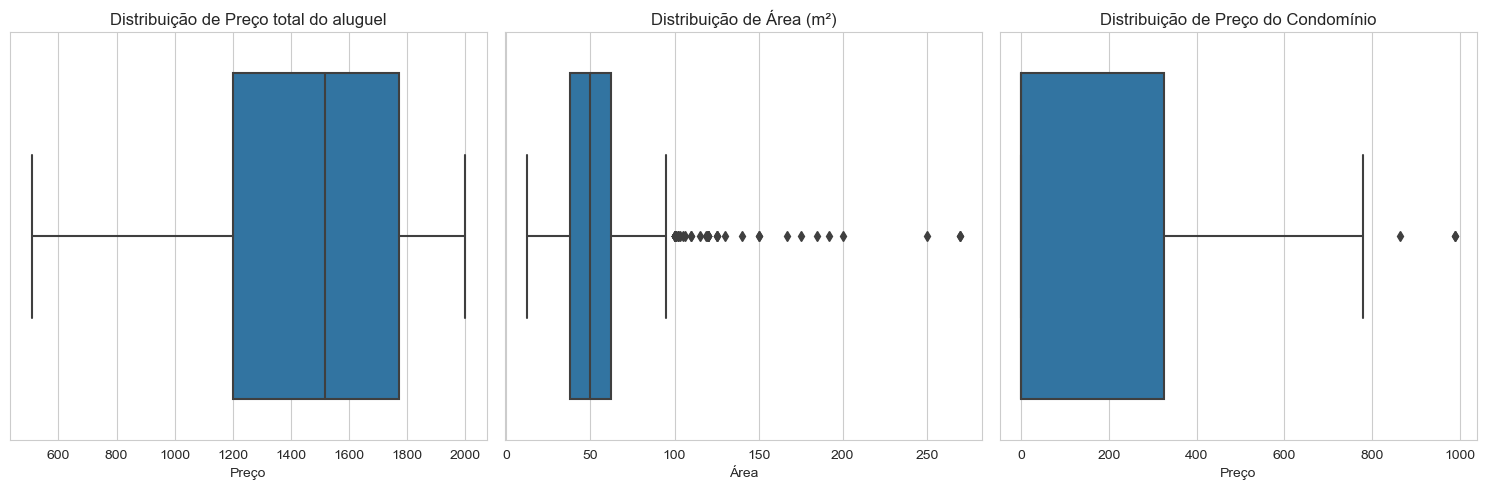

In [72]:
# Configura o estilo do seaborn
sns.set_style("whitegrid")

# Cria uma figura e eixos para os subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plota o primeiro gráfico
sns.boxplot(x=precoAluguelImoveisSP_df["total (R$)"], ax=axs[0])
axs[0].set_title('Distribuição de Preço total do aluguel')
axs[0].set_xlabel('Preço')

# Plota o segundo gráfico
sns.boxplot(x=precoAluguelImoveisSP_df["area"], ax=axs[1])
axs[1].set_title('Distribuição de Área (m²)')
axs[1].set_xlabel('Área')

# Plota o terceiro gráfico
sns.boxplot(x=precoAluguelImoveisSP_df["hoa (R$)"], ax=axs[2])
axs[2].set_title('Distribuição de Preço do Condomínio')
axs[2].set_xlabel('Preço')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Mostra o gráfico
plt.show()

#### Grafico 1
* A distribuição dos dados do aluguel está dentro do esperado, sua maioria estando acima de 1200 reais, com seu maior em 2000R\$

#### Grafico 2
* A distribuição da área tem 75% dos dados abaixo de 62.5m², mas existem alguns imoveis acima de 100m² chegando até imoveis com mais de 250m²

#### Grafico 3
* 50% dos imoveis não pagam Condomínio (provavel que não estejam em Condomínios), entre 50% e 75% é possivel observar que o valor maximo de Condomínio é de 325R\$

* Existem alguns valores de outliers onde o Condomínio chega a ser 49,5% (990,00 Reais) de um aluguel de 2000R\$

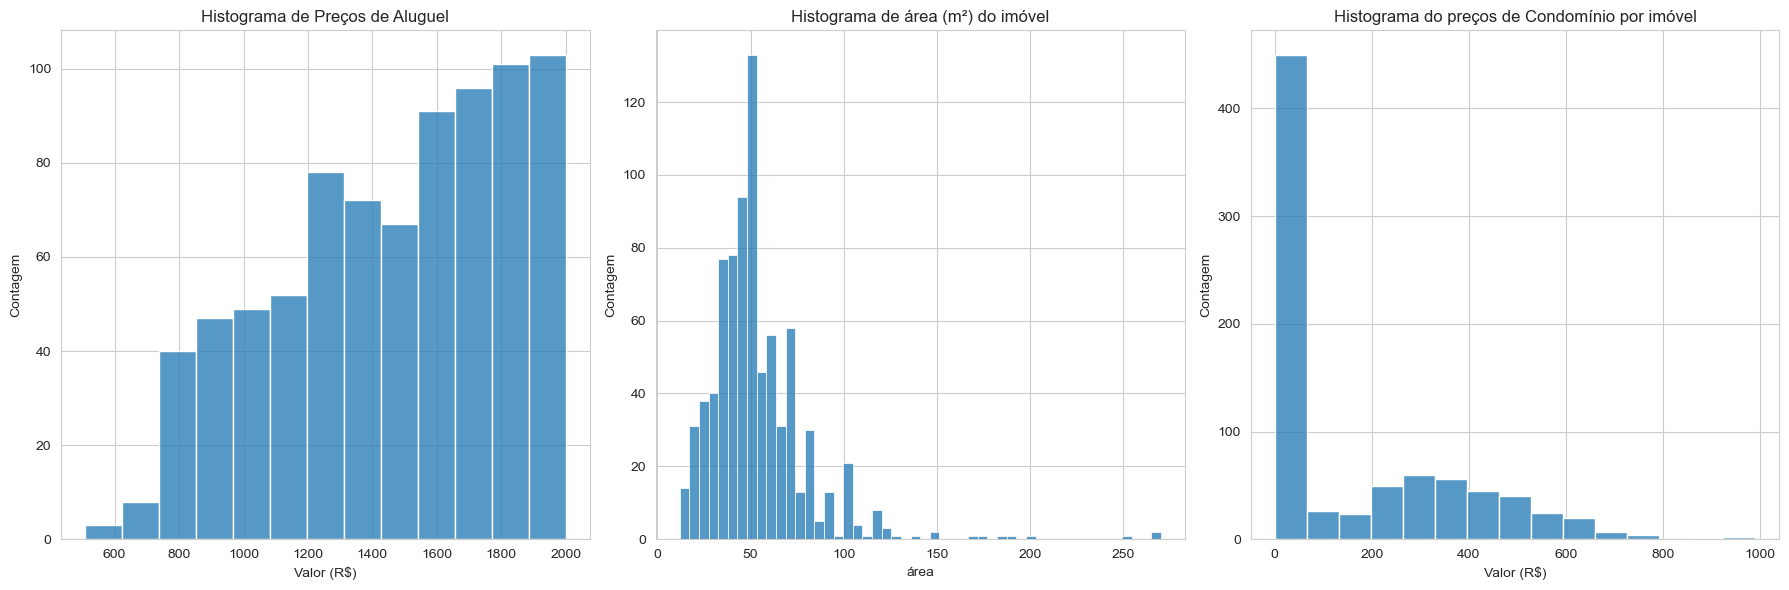

In [73]:
# Criando a figura e os subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Definindo o estilo dos eixos para 'whitegrid'
with sns.axes_style('whitegrid'):
    # Plotando o primeiro histograma
    sns.histplot(data=precoAluguelImoveisSP_df, x="total (R$)", ax=axs[0])
    axs[0].set(title='Histograma de Preços de Aluguel', xlabel='Valor (R$)', ylabel='Contagem')
    
    # Plotando o segundo histograma
    sns.histplot(data=precoAluguelImoveisSP_df, x="area", ax=axs[1])
    axs[1].set(title='Histograma de área (m²) do imóvel', xlabel='área', ylabel='Contagem')
    
    # Plotando o terceiro histograma
    sns.histplot(data=precoAluguelImoveisSP_df, x="hoa (R$)", ax=axs[2])
    axs[2].set(title='Histograma do preços de Condomínio por imóvel', xlabel='Valor (R$)', ylabel='Contagem')

# Ajustando o layout
plt.tight_layout()

# Exibindo os gráficos
plt.show()

# Responder as Perguntas

## Perguntas
- Existe Relação entre quantidade de quartos e preço em imóveis da cidade de São Paulo abaixo de 2000R\$?
- Existe Relação entre quantidade de banheiros e preço em imóveis da cidade de São Paulo abaixo de 2000R\$?
- Existe Relação entre quantidade de garagens e preço em imóveis da cidade de São Paulo abaixo de 2000R\$?

## Existe Relação entre quantidade de quartos e preço em imóveis da cidade de São Paulo abaixo de 2000R\$?

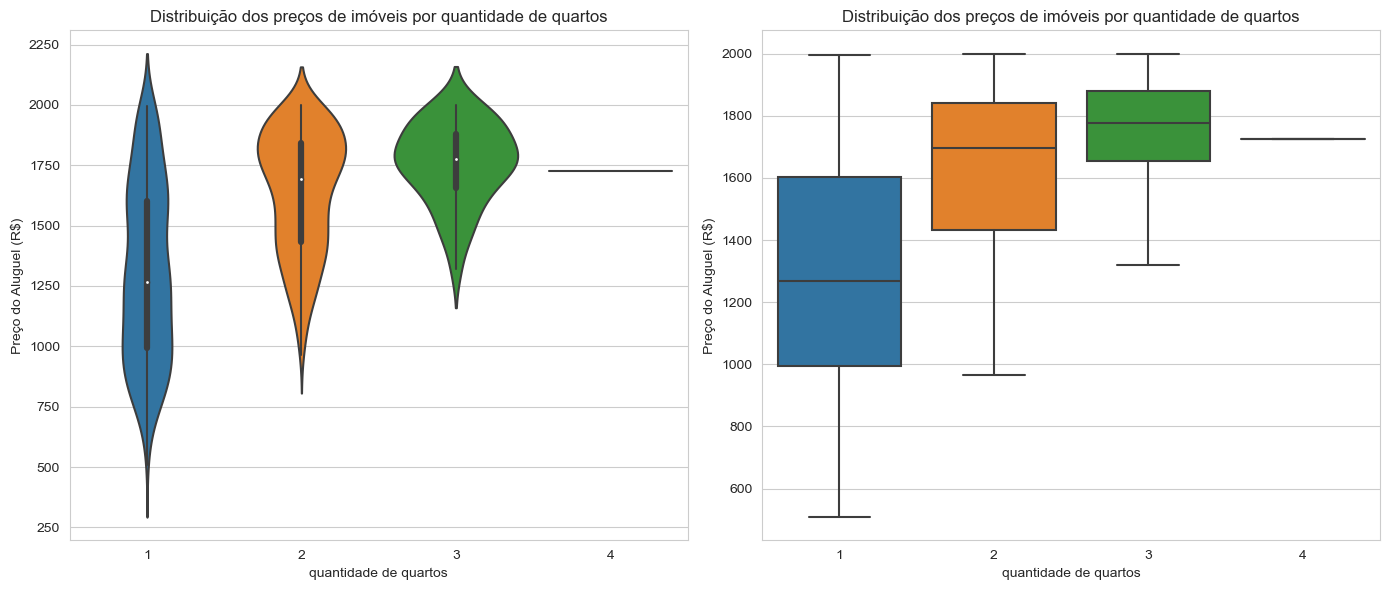

In [74]:
# Criando a figura e os subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plotando o gráfico de violino no primeiro subplot
sns.violinplot(data=precoAluguelImoveisSP_df, x='rooms', y='total (R$)', ax=axs[0])
axs[0].set_title('Distribuição dos preços de imóveis por quantidade de quartos')
axs[0].set_xlabel('quantidade de quartos')
axs[0].set_ylabel('Preço do Aluguel (R$)')

# Plotando o gráfico de caixa no segundo subplot
sns.boxplot(data=precoAluguelImoveisSP_df, x='rooms', y='total (R$)', ax=axs[1])
axs[1].set_title('Distribuição dos preços de imóveis por quantidade de quartos')
axs[1].set_xlabel('quantidade de quartos')
axs[1].set_ylabel('Preço do Aluguel (R$)')

# Ajustando o layout
plt.tight_layout()

# Exibindo os gráficos
plt.show()

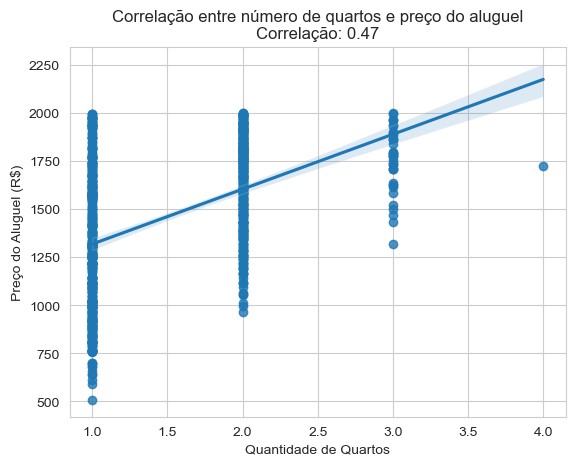

In [75]:
# Calculando a correlação entre as variáveis
coeficiente_correlacao = precoAluguelImoveisSP_df['rooms'].corr(precoAluguelImoveisSP_df['total (R$)'])

# Plotando o gráfico de dispersão com a linha de regressão
sns.regplot(data=precoAluguelImoveisSP_df, x='rooms', y='total (R$)')

# Definindo o título e os rótulos dos eixos
plt.title('Correlação entre número de quartos e preço do aluguel\nCorrelação: {:.2f}'.format(coeficiente_correlacao))
plt.xlabel('Quantidade de Quartos')
plt.ylabel('Preço do Aluguel (R$)')

# Exibindo o gráfico
plt.show()

* ### O coeficiente de correlação de 0.47 indica uma correlação positiva moderada entre a quantidade de quartos e o preço dos imóveis na cidade de São Paulo, considerando valores de aluguel abaixo de R\$ 2000. Isso sugere que, em média, um aumento na quantidade de quartos está associado a um aumento no preço do aluguel. 
* ### Também é possível ver essa tendência pelos graficos Violinplot e Boxplot.

## Existe Relação entre quantidade de banheiros e preço em imóveis da cidade de São Paulo abaixo de 2000R\$?

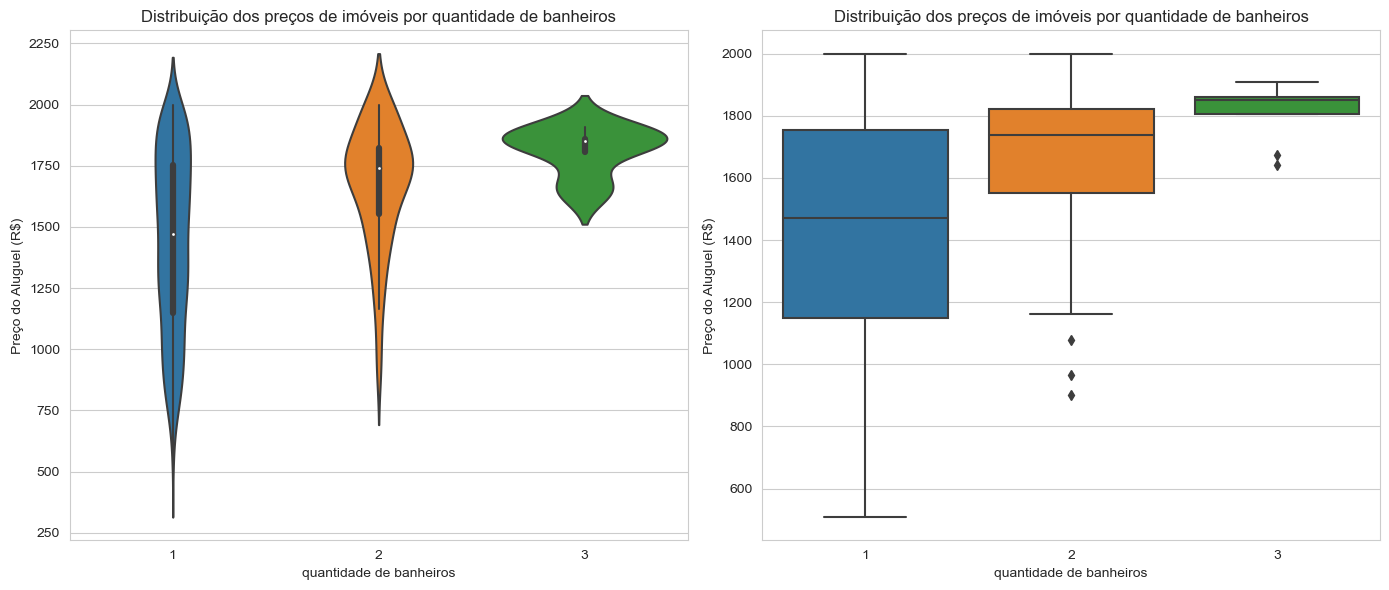

In [76]:
# Criando a figura e os subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plotando o gráfico de violino no primeiro subplot
sns.violinplot(data=precoAluguelImoveisSP_df, x='bathroom', y='total (R$)', ax=axs[0])
axs[0].set_title('Distribuição dos preços de imóveis por quantidade de banheiros')
axs[0].set_xlabel('quantidade de banheiros')
axs[0].set_ylabel('Preço do Aluguel (R$)')

# Plotando o gráfico de caixa no segundo subplot
sns.boxplot(data=precoAluguelImoveisSP_df, x='bathroom', y='total (R$)', ax=axs[1])
axs[1].set_title('Distribuição dos preços de imóveis por quantidade de banheiros')
axs[1].set_xlabel('quantidade de banheiros')
axs[1].set_ylabel('Preço do Aluguel (R$)')

# Ajustando o layout
plt.tight_layout()

# Exibindo os gráficos
plt.show()

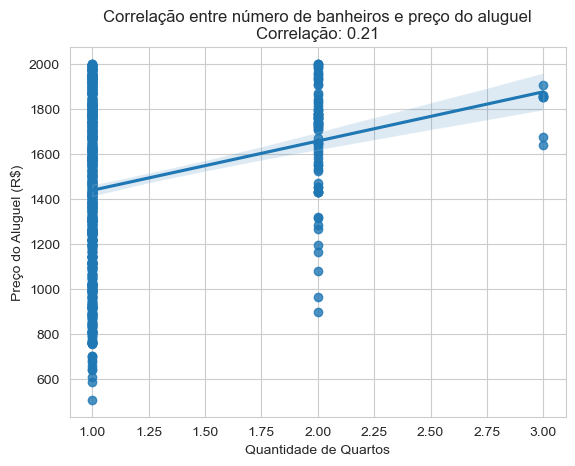

In [77]:
# Calculando a correlação entre as variáveis
coeficiente_correlacao = precoAluguelImoveisSP_df['bathroom'].corr(precoAluguelImoveisSP_df['total (R$)'])

# Plotando o gráfico de dispersão com a linha de regressão
sns.regplot(data=precoAluguelImoveisSP_df, x='bathroom', y='total (R$)')

# Definindo o título e os rótulos dos eixos
plt.title('Correlação entre número de banheiros e preço do aluguel\nCorrelação: {:.2f}'.format(coeficiente_correlacao))
plt.xlabel('Quantidade de Quartos')
plt.ylabel('Preço do Aluguel (R$)')

# Exibindo o gráfico
plt.show()

* ### O coeficiente de correlação de 0.21 indica uma correlação positiva relativamente fraca entre a quantidade de banheiros e o preço dos imóveis na cidade de São Paulo, considerando valores de aluguel abaixo de R$ 2000. Isso sugere que, em média, um aumento na quantidade de banheiros está associado a um aumento no preço do aluguel, mas a relação não é muito forte. Portanto, embora haja uma tendência para imóveis com mais banheiros terem preços de aluguel mais altos não é algo tão significativo.
* ### Também é possível ver essa tendência pelos graficos Violinplot e Boxplot, onde não tem imóveis com 3 banheiros com valores abaixo de 1500R\$.

## Existe Relação entre quantidade de garagens e preço em imóveis da cidade de São Paulo abaixo de 2000R\$

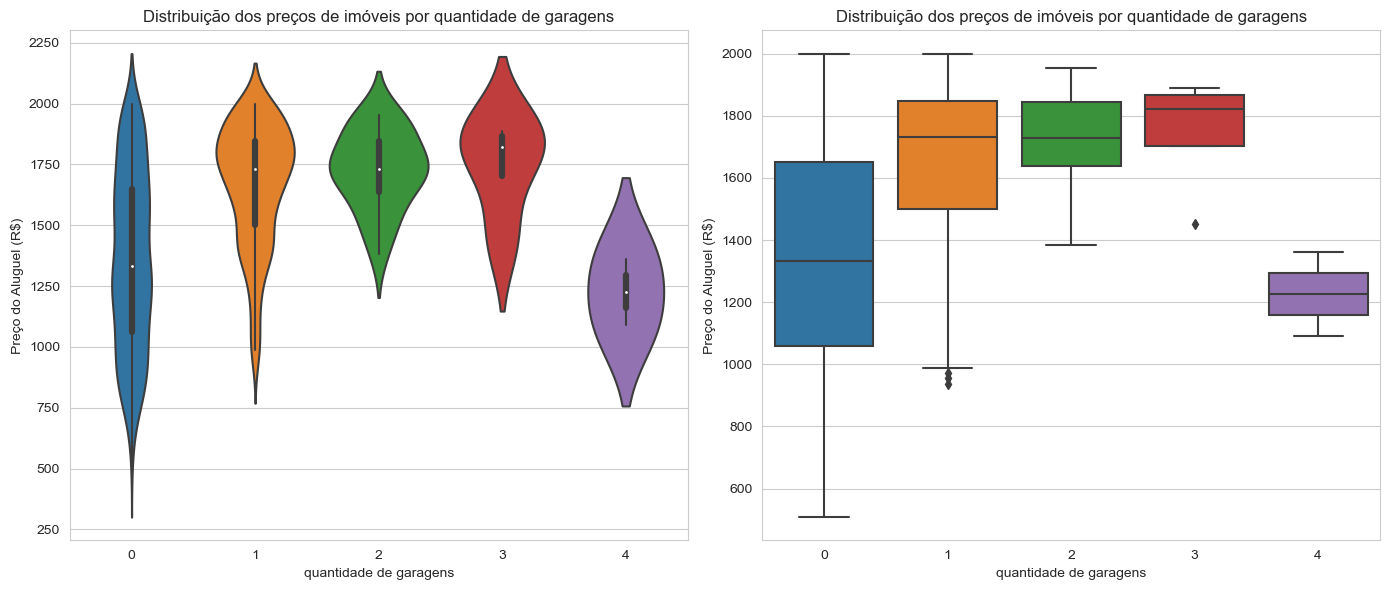

In [78]:
# Criando a figura e os subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plotando o gráfico de violino no primeiro subplot
sns.violinplot(data=precoAluguelImoveisSP_df, x='parking spaces', y='total (R$)', ax=axs[0])
axs[0].set_title('Distribuição dos preços de imóveis por quantidade de garagens')
axs[0].set_xlabel('quantidade de garagens')
axs[0].set_ylabel('Preço do Aluguel (R$)')

# Plotando o gráfico de caixa no segundo subplot
sns.boxplot(data=precoAluguelImoveisSP_df, x='parking spaces', y='total (R$)', ax=axs[1])
axs[1].set_title('Distribuição dos preços de imóveis por quantidade de garagens')
axs[1].set_xlabel('quantidade de garagens')
axs[1].set_ylabel('Preço do Aluguel (R$)')

# Ajustando o layout
plt.tight_layout()

# Exibindo os gráficos
plt.show()

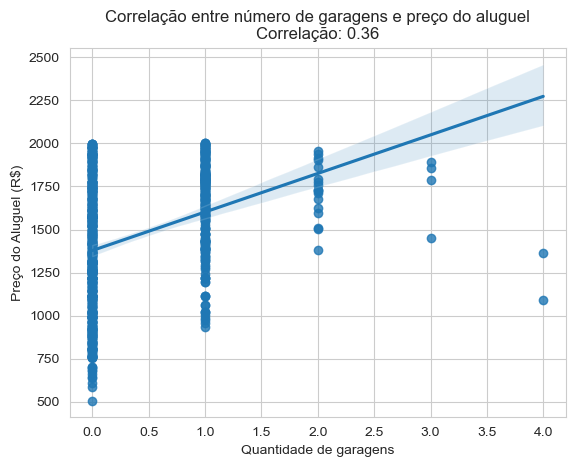

In [79]:
# Calculando a correlação entre as variáveis
coeficiente_correlacao = precoAluguelImoveisSP_df['parking spaces'].corr(precoAluguelImoveisSP_df['total (R$)'])

# Plotando o gráfico de dispersão com a linha de regressão
sns.regplot(data=precoAluguelImoveisSP_df, x='parking spaces', y='total (R$)')

# Definindo o título e os rótulos dos eixos
plt.title('Correlação entre número de garagens e preço do aluguel\nCorrelação: {:.2f}'.format(coeficiente_correlacao))
plt.xlabel('Quantidade de garagens')
plt.ylabel('Preço do Aluguel (R$)')

# Exibindo o gráfico
plt.show()

* ### O coeficiente de correlação de 0.36 indica uma correlação positiva relativamente fraca entre a quantidade de garagens e o preço dos imóveis na cidade de São Paulo, considerando valores de aluguel abaixo de R$ 2000. Isso sugere que, em média, um aumento na quantidade de garangens está associado a um aumento no preço do aluguel, mas a relação não é muito forte. Portanto, embora haja uma tendência para imóveis com mais garagens terem preços de aluguel mais altos não é algo absoluto, pois podemos perceber que existem imóveis com 4 quartos com menor valor de aluguel que imóveis com 2 quartos.
* ### Também é possível ver essa tendência pelos graficos Violinplot e Boxplot